<h4>Question1</h4>

In [6]:
#Step1 : necessary libraries
import pandas as pd

#Step2 :mporting the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
#Step 3: Assign it to a variable called users 
users = pd.read_csv(url, sep='|', index_col='user_id')

#Step 4:  The mean age per occupation
meanage_per_occupation = users.groupby('occupation')['age'].mean()

#Step 5: Discover the Male ratio per occupation and sort it from most to least
maleratio_per_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').sum() / x.count()).sort_values(ascending=False)

#Step 6: For each occupation, calculate the minimum and maximum ages
minmax_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

#Step 7: For each combination of occupation and sex, calculate the mean age
meanage_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

#Step 8: For each occupation, present the percentage of women and men
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100


print("Mean Age per Occupation:")
print(meanage_per_occupation)

print("\nMale Ratio per Occupation (sorted):")
print(maleratio_per_occupation)

print("\nMinimum and Maximum Ages per Occupation:")
print(minmax_ages_per_occupation)

print("\nMean Age per Occupation and Sex:")
print(meanage_per_occupation_sex)

print("\nPercentage of Women and Men per Occupation:")
print(gender_percentage_per_occupation.round(2))


Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation (sorted):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other      

<h4>Question2</h4>

In [13]:
 #Step 1: Import necessary libraries
import pandas as pd

#Step 2 and 3: Import dataset and assign it to a variable called euro12
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

#Step 4: Select only the Goal column
goals = euro12['Goals']

#Step 5: The number of teams that participated in Euro 2012
num_teams = euro12['Team'].nunique()

#Step 6: The number of columns in the dataset
num_columns = len(euro12.columns)

#Step 7: View of the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

#Step 8: Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

#Step 9: The mean Yellow Cards given per Team
mean_yellow_cards = euro12['Yellow Cards'].mean()

#Step 10: Filtered teams that scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6]

#Step 11: The teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

#Step 12:The first 7 columns
first_7_columns = euro12.iloc[:, :7]

#Step 13: All columns except the last 3
all_except_last_3 = euro12.iloc[:, :-3]

#Step 14: The Shooting Accuracy from England, Italy, and Russia
selected_teams_shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]


print(f"Goal column:\n {goals}")
print(f"\nNumber of teams in Euro 2012: {num_teams}")
print(f"\nNumber of columns in the dataset: {num_columns}")
print(f"\nView:{discipline}")
print(f"\nSorted:{discipline_sorted}")
print(f"\nMean Yellow Cards given per Team: {mean_yellow_cards}\n")
print(f"highscoringteams: {high_scoring_teams}")
print(first_7_columns)
print(teams_starting_with_G)
print(all_except_last_3)
print("\nSelected Teams' Shooting Accuracy:")
print(selected_teams_shooting_accuracy)



Goal column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams in Euro 2012: 16

Number of columns in the dataset: 35

View:                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14 

<h4>Question3</h4>

In [24]:
#Step1 : Importing necessary libraries
import pandas as pd
import numpy as np

#Step 2: Creating three Series of length 100
series1 = pd.Series(np.random.randint(1, 5, size=100)) 
series2 = pd.Series(np.random.randint(1, 4, size=100))  
series3 = pd.Series(np.random.randint(10000, 30001, size=100))  

#Step 3: Creating a DataFrame by joining the Series by column
data = {'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3}
house_df = pd.DataFrame(data)

#Step 4: Changing the name of the columns
house_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

#Step 5: Creating a one-column DataFrame with values of the 3 Series
bigcolumn = pd.concat([series1, series2, series3], axis=0, ignore_index=True)

#Step 6: Checking if it stops at index 99
print(bigcolumn.index.max())  # Check the maximum index value

#Step 7: Reindexing the DataFrame to go from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)  # Resetting index

#print(bigcolumn.index.max())
print(f"Series1:\n{series1}\n")
print(f"Series2:\n{series2}\n")
print(f"Series3:\n{series3}\n")
print(house_df)

299
Series1:
0     1
1     4
2     3
3     2
4     4
     ..
95    2
96    3
97    3
98    3
99    2
Length: 100, dtype: int32

Series2:
0     3
1     3
2     1
3     3
4     3
     ..
95    3
96    1
97    2
98    2
99    2
Length: 100, dtype: int32

Series3:
0     16767
1     26844
2     19601
3     13208
4     11227
      ...  
95    12848
96    21836
97    22048
98    19070
99    27990
Length: 100, dtype: int32

    bedrs  bathrs  price_sqr_meter
0       1       3            16767
1       4       3            26844
2       3       1            19601
3       2       3            13208
4       4       3            11227
..    ...     ...              ...
95      2       3            12848
96      3       1            21836
97      3       2            22048
98      3       2            19070
99      2       2            27990

[100 rows x 3 columns]


<h4>Question4</h4>

In [1]:
import pandas as pd

file_path = 'wind.txt'
column_names = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
data = pd.read_csv(file_path, sep='\s+', names=column_names, parse_dates={'Date': ['Yr', 'Mo', 'Dy']})

print(data.head())
print(data.isnull().sum())
mean_values = data.mean()
print("\nMean values for each column:")
print(mean_values)
data_filled = data.fillna(mean_values)
print("\nData after filling missing values:")
print(data_filled.head())

       Date    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  Yr Mo Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL   
1    61 1 1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
2    61 1 2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
3    61 1 3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
4    61 1 4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   

     CLO    BEL    MAL  
0    CLO    BEL    MAL  
1  12.58  18.50  15.04  
2   9.67  17.54  13.83  
3   7.67  12.75  12.71  
4   5.88   5.46  10.88  
Date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

Mean values for each column:
Series([], dtype: float64)

Data after filling missing values:
       Date    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  Yr Mo Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL 

C:\Users\marys\AppData\Local\Temp\ipykernel_17452\2383616522.py:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()


<h4>Question5</h4>

In [26]:
#Step1. Import necessary libraries
import pandas as pd

#Step2. Import the dataset from the given address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

#Step3. Assign it to a variable called chipo

#Step4. See the first 10 entries
print(chipo.head(10))

#Step5. What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

#Step6. What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

#Step7. Print the name of all the columns
print("Columns:", chipo.columns.tolist())

#Step8. How is the dataset indexed?
print("Index:", chipo.index)

#Step9. Which was the most-ordered item?
most_ordered_item = chipo['item_name'].mode()[0]
print("Most-ordered item:", most_ordered_item)

#Step10. For the most-ordered item, how many items were ordered?
num_most_ordered_item = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nNumber of most-ordered item ordered:", num_most_ordered_item)

#Step11. What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].mode()[0]
print("\nMost ordered item in choice_description:", most_ordered_choice)

#Step12. How many items were ordered in total?
total_ordered_items = chipo['quantity'].sum()
print("\nTotal ordered items:", total_ordered_items)

#Step13. Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("\nItem price type after conversion:", chipo['item_price'].dtype)

#Step14. Calculate the revenue for the period in the dataset
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nRevenue for the period:", round(revenue, 2))

#Step15. How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("\nNumber of orders made:", num_orders)

#Step16. Calculate the average revenue amount per order
avg_revenue_per_order = revenue / num_orders
print("\nAverage revenue amount per order:", round(avg_revenue_per_order, 2))

#Step17. How many different items are sold?
num_different_items_sold = chipo['item_name'].nunique()
print("\nNumber of different items sold:", num_different_items_sold)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

<h4>Question6</h4>

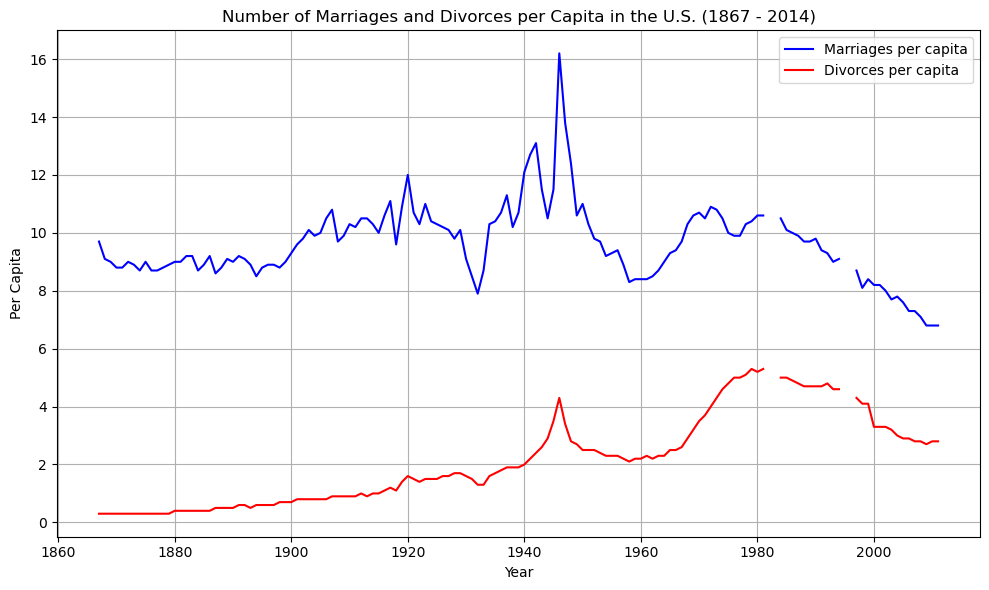

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

us_marriages_divorces = pd.read_csv('us_marriages_divorces.csv')
years = us_marriages_divorces['Year']
marriages_per_capita = us_marriages_divorces['Marriages_per_1000']
divorces_per_capita = us_marriages_divorces['Divorces_per_1000']


plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_capita, label='Marriages per capita', color='blue')

plt.plot(years, divorces_per_capita, label='Divorces per capita', color='red')

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867 - 2014)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Question 7 </h4>

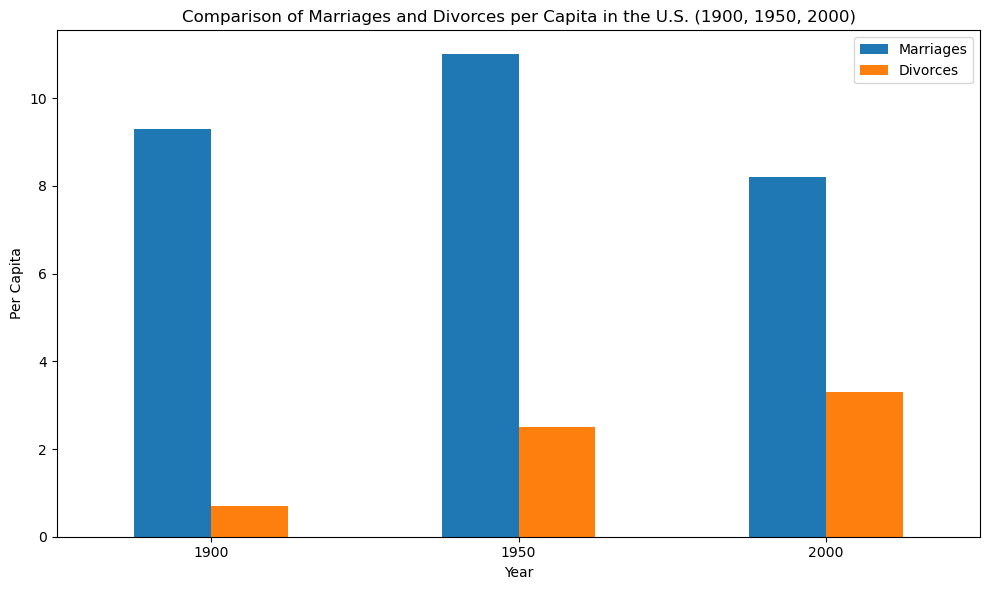

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
us_marriages_divorces = pd.read_csv('us_marriages_divorces.csv')

years = [1900, 1950, 2000]
selected_years = us_marriages_divorces[us_marriages_divorces['Year'].isin(years)]

selected_data = selected_years[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]

selected_data.set_index('Year', inplace=True)
selected_data.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.legend(['Marriages', 'Divorces'])
plt.xticks(rotation=0)  
#display plot
plt.tight_layout()
plt.show()


<h4> Question 8</h4>

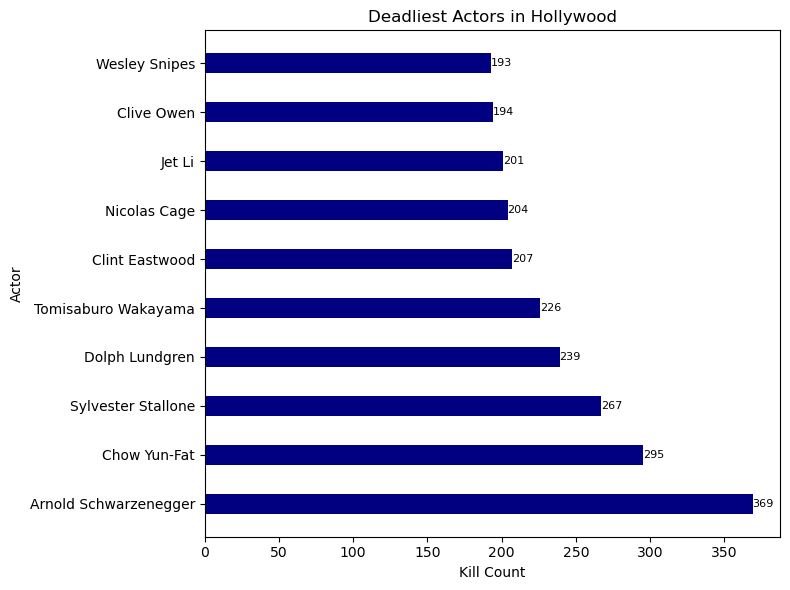

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

actor_kill_counts = pd.read_csv('actor_kill_counts.csv')
actor_kill_counts_sorted = actor_kill_counts.sort_values(by='Count', ascending=False)

actors = actor_kill_counts_sorted['Actor']
kill_counts = actor_kill_counts_sorted['Count']

plt.figure(figsize=(8, 6))
plt.barh(actors, kill_counts, color='navy' ,height=0.4)

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
for index, value in enumerate(kill_counts):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=8)  # Display count on bars

plt.tight_layout()
plt.show()


<h4>Question 9</h4>

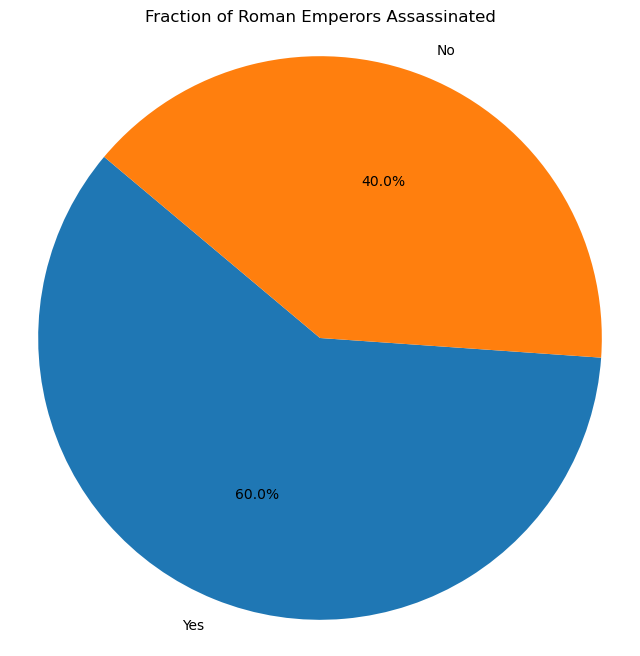

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'Emperor': ['Emperor A', 'Emperor B', 'Emperor C', 'Emperor D', 'Emperor E'],
    'Assassinated': ['Yes', 'No', 'Yes', 'No', 'Yes']
}
roman_emperor_reigns = pd.DataFrame(data)
assassinated_count = roman_emperor_reigns['Assassinated'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(assassinated_count, labels=assassinated_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal')
plt.show()


<h4>Question 10</h4>

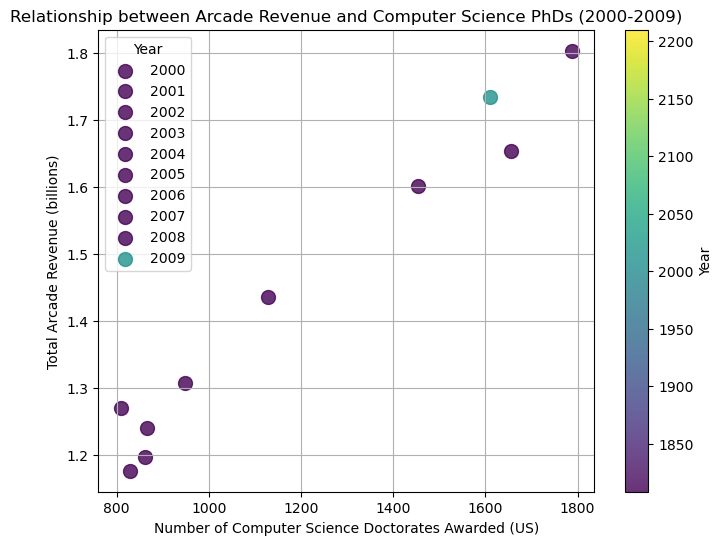

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('arcade_revenue_vs_cs_doctorates.csv')

years = data['Year']
revenue = data['Total Arcade Revenue (billions)']
phds_awarded = data['Computer Science Doctorates Awarded (US)']

plt.figure(figsize=(8, 6))
for i in range(len(years)):
    plt.scatter(phds_awarded[i], revenue[i], c=years[i], cmap='viridis', s=100, alpha=0.8,
                label=str(years[i]))

plt.xlabel('Number of Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.colorbar(label='Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()
